# Exploratory Analysis of Real Estate News Data

## Setup

In [1]:
import pandas as pd
import numpy as np
import os, sys
import json
from dotenv import find_dotenv, load_dotenv
from datetime import datetime

sys.path.append('../')
from src.data.azure_storage_utils import load_text_file
from src.data.preprocess_utils import preprocess_document

In [2]:
with open("../src/config.json", "r") as f:
    cfg = json.load(f)
    
load_dotenv(find_dotenv())
AZURE_STORAGE_NAME = os.environ.get("AZURE_STORAGE_NAME")
AZURE_STORAGE_KEY = os.environ.get("AZURE_STORAGE_KEY")

In [3]:
# load stored data from blob store
dRaw = load_text_file(
    containerName = cfg["azureStorage"]["containerName"], 
    blobName = cfg["azureStorage"]["blobName"],
    accountName = AZURE_STORAGE_NAME,
    accountKey = AZURE_STORAGE_KEY
    )

## General Overview

See how the feedly data is stuctured

In [4]:
len(dRaw)

3758

In [5]:
list(dRaw.items())[0]

('tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e',
 {'unread': False,
  'published': 1443047720879,
  'summary': {'direction': 'ltr',
   'content': '<img height="55" alt="Copyright Fotolia.de / nmann77" align="left" width="55" src="http://www.immonewsfeed.de/upload/immonews/small/1442390871_Fotolia_62893253_X-nmann77.jpg"><p>Wie der Verband Haus &amp; Grund mitteilt, wird die Nachfrage nach Wohnraum in den kommenden Jahren höher als angenommen sein. Die hohen Zuwanderungs- und Flüchtlingszahlen würden ein schnelles Handeln erfordern, um den Menschen Wohnungen anbieten zu können. Der Verband fordert deshalb die Politik auf, die Kosten für den Wohnungsbau zu senken.\nVon den allein in diesem Jahr erwarteten 800.000 Flüchtlingen würden laut Haus &amp; Grund viele dauerhaft in Deutschland wohnen bleiben. Damit der erforderliche Wohnraum gebaut werden kann, sei ein ganzes Bündel an Maßnahmen notwendig:\nErhöhung der steuerlichen Abschreibung von zwei auf vier Pro

In [9]:
# convert to dataframe
dDocs = pd.DataFrame.from_dict(dRaw).transpose()
dDocs = dDocs[["feedTitle", "author", "published", "engagement", "title", "summary"]]

for i in dDocs.index:
    try:
        dDocs["summary"][i] = dDocs["summary"][i]["content"]
    except TypeError:
        dDocs["summary"][i] = None

# convert timestamps
dDocs["published"] = pd.to_datetime(dDocs["published"], unit="ms")
dDocs["published_period"] = pd.DatetimeIndex(dDocs["published"]).to_period("M").astype(str)

dDocs.head()

,feedTitle,author,published,engagement,title,summary,published_period
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e,Immonews RSS Feed,Fotolia.de / nmann77,2015-09-23 22:35:20.879,7,24.09.2015 - Politik & Wirtschaft: Haus & Grun...,"<img height=""55"" alt=""Copyright Fotolia.de / n...",2015-09
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_15994eb4e80:6bb50cc:1e99f69f,Immonews RSS Feed,Fotolia.de / 2xwilfinger,2017-01-12 23:02:46.144,17,13.01.2017 - Leben & Wohnen: Ausnahme beim Win...,"<img height=""55"" alt=""Copyright Fotolia.de / 2...",2017-01
hu94UCg3vuxifOgio/b16czFOOJs9C7thvt+mklFm78=_15f5873f95f:9d862cf:4d363ef0,RETN - Real Estate Tech News,Lindsey Imperatore,2017-10-26 11:30:00.000,1,Exclusive Q&A With #RETAS Sponsor Glenn Murray...,FUEL Enterprises develops cloud-based technolo...,2017-10
pAll0y5reb9EOfInG4eisUIzkoZc4xCx0HyK02/6FhU=_1436d43bf75:11670829:d7247628,Property Management Insider,Greg Willett,2014-01-07 15:50:04.000,14,Will Oakland’s Apartment Market Lead the Way i...,"<img src=""https://www.propertymanagementinside...",2014-01
xWDIGZBMt8xnhnzyNkukvtkIAR2mBD5dsDLzMT+azN4=_16204a07f50:21ee66:4e6e6075,PropTech News,proptechnews,2018-03-08 08:00:50.000,0,"Mehr, mehr, mehr PropTech",Diese Woche fand der 4. Digital Real Estate Su...,2018-03


## Time of Publication

In [10]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

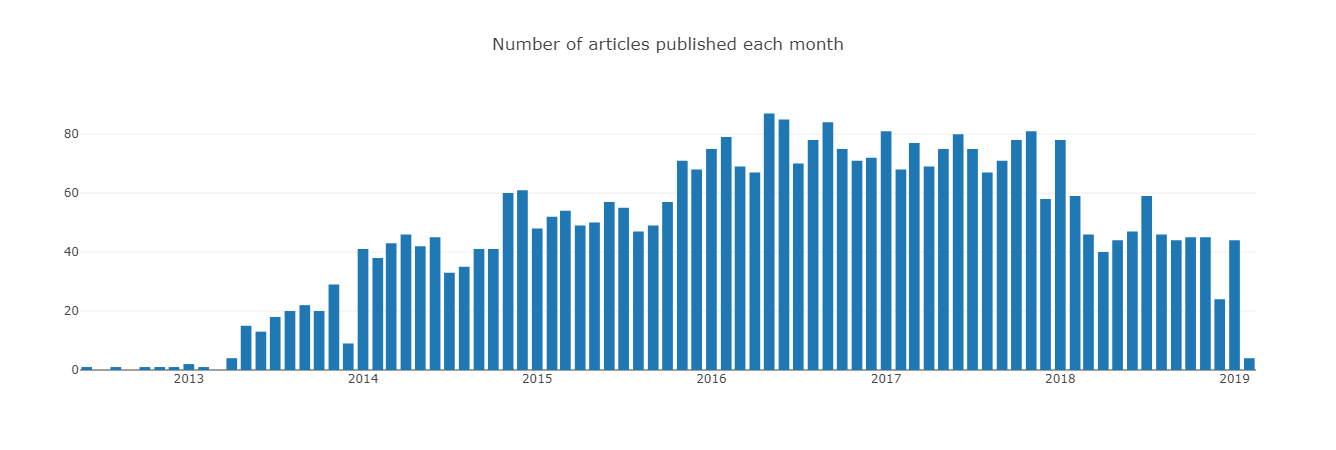

In [11]:
plotData = dDocs.groupby("published_period")
plotData = plotData.count().reset_index()

p = [go.Bar(x=plotData["published_period"], y=plotData["published"])]
l = go.Layout(title = "Number of articles published each month")
plotly.offline.iplot({"data": p, "layout":l})

Most articles were published between 2016 and 2018


## Sources

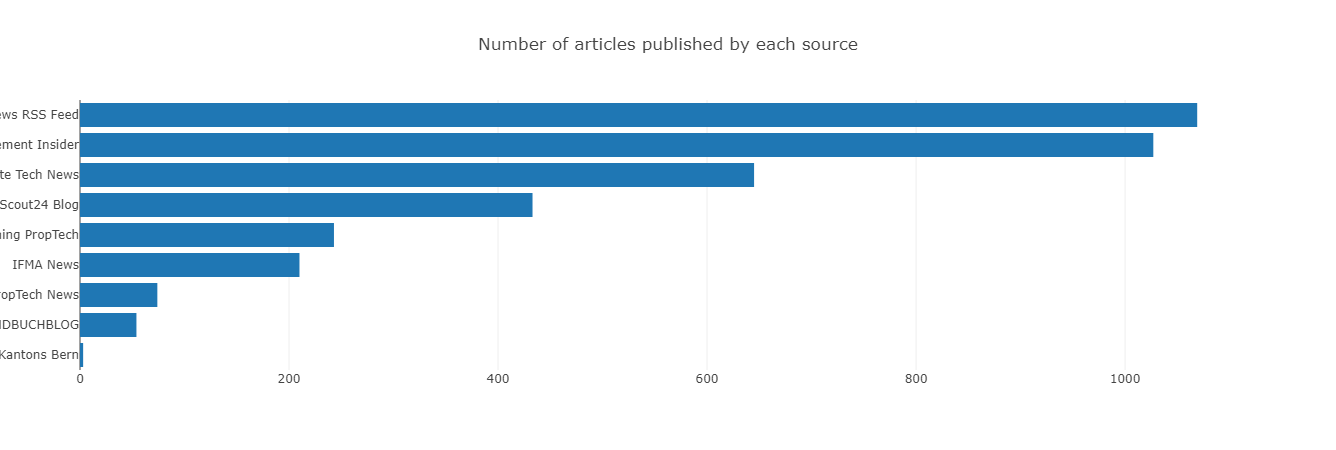

In [12]:
plotData = dDocs.groupby("feedTitle")
plotData = plotData.count().reset_index().sort_values(["published_period"])


p = [go.Bar(x=plotData["published"], y=plotData["feedTitle"], orientation="h")]
l = go.Layout(title = "Number of articles published by each source")
plotly.offline.iplot({"data": p, "layout":l})

## Document Characteristics

In [13]:
summaries = list()
for d in dDocs.index:
    summaries.append(preprocess_document(dDocs["summary"][d]))

summaries[:3]

['wie der verband haus  grund mitteilt wird die nachfrage nach wohnraum in den kommenden jahren hoher als angenommen sein die hohen zuwanderungs und fluchtlingszahlen wurden ein schnelles handeln erfordern um den menschen wohnungen anbieten zu konnen der verband fordert deshalb die politik auf die kosten fur den wohnungsbau zu senken\nvon den allein in diesem jahr erwarteten 800000 fluchtlingen wurden laut haus  grund viele dauerhaft in deutschland wohnen bleiben damit der erforderliche wohnraum gebaut werden kann sei ein ganzes bundel an manahmen notwendig\nerhohung der steuerlichen abschreibung von zwei auf vier prozent\ngrunderwerbsteuersatz in alter hohe von 35 prozent\nverstarkte ausweisung von bauland\nlockerung der energetischen anforderungen an neu und bestandsbauten\nbereitstellung von mehr wohnraum in innenstadten zum beispiel durch eine baurechtlich vereinfachte aufstockung von gebauden\nabschaffung der mietpreisbremse\nnur wenn die koordination von bund landern und kommunen

In [14]:

summaries = dict()
titles = dict()

# extract titles and summaries (v.get / try to handle missing summaries)
# remove html elements from summary
for k, v in dRaw.items():
    titles[k] = v.get("title")
    try:
        tmpSummary = v.get("summary").get("content")
        summaries[k] = strip_html(tmpSummary)
    except AttributeError:
        summaries[k] = None


NameError: name 'strip_html' is not defined

In [ ]:
# word tokenize summaries and titles
for k, v in summaries.items():
    try:
        summaries[k] = nltk.tokenize.word_tokenize(v)
    except TypeError:
        summaries[k] = None

In [15]:
# check equal length of dDocs and summaries
print(len(summaries))
print(len(dDocs))

ArticleLengths = list()
for i in dDocs.index:
    try:
        ArticleLengths.append(len(summaries[i]))
    except TypeError:
        ArticleLengths.append(0)

dDocs["ArticleLength"] = ArticleLengths
dDocs.head()

0
3758


KeyError: 'tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e'

In [16]:
# vocabulary
# most popular words (overall, tf/idf)
a = ["", " ", None]


for i in a:
    print(preprocess_document(i) + "aaa")
    

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [17]:
def somefun(text):
    return "aaa" + text

somefun_vectorized = np.vectorize(somefun)
somefun_vectorized(["a", "b", "c"])

array(['aaaa', 'aaab', 'aaac'], dtype='<U4')

NameError: name 'reload' is not defined